<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gathering-data" data-toc-modified-id="Gathering-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gathering data</a></span></li><li><span><a href="#Preparing-data" data-toc-modified-id="Preparing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing data</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Visualizing-some-more-of-the-data" data-toc-modified-id="Visualizing-some-more-of-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualizing some more of the data</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Converting-Categorical-Features" data-toc-modified-id="Converting-Categorical-Features-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Converting Categorical Features</a></span></li></ul></li><li><span><a href="#Choose-a-model" data-toc-modified-id="Choose-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choose a model</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Run-against-test-dataset" data-toc-modified-id="Run-against-test-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Run against test dataset</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Adapt-TensorFlow-runs-to-log-hyperparameters-and-metrics" data-toc-modified-id="Adapt-TensorFlow-runs-to-log-hyperparameters-and-metrics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Adapt TensorFlow runs to log hyperparameters and metrics</a></span><ul class="toc-item"><li><span><a href="#Start-runs-and-log-them" data-toc-modified-id="Start-runs-and-log-them-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Start runs and log them</a></span></li><li><span><a href="#Visualize-the-results-in-TensorBoard’s-HParams-plugin" data-toc-modified-id="Visualize-the-results-in-TensorBoard’s-HParams-plugin-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Visualize the results in TensorBoard’s HParams plugin</a></span></li></ul></li><li><span><a href="#Prediction-(and-save-model)" data-toc-modified-id="Prediction-(and-save-model)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Prediction (and save model)</a></span></li><li><span><a href="#And-to-load-a-model-saved-via-save()" data-toc-modified-id="And-to-load-a-model-saved-via-save()-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>And to load a model saved via save()</a></span></li></ul></div>

Guo laid out the 7 steps as follows:

    Gathering data
    Preparing data (and exploring data)
    Choosing a model
    Training
    Evaluation
    Hyperparameter tuning
    Prediction (and save model)
    
Let's pretend that we've been asked to create a system that predicts survival on the Titanic.

# Gathering data

Let's import some libraries and load data to get started!

Once we have our question defined, it’s time for our first real step of machine learning: gathering data. This step is the most important because the quality and quantity of data that you gather will directly determine how good your predictive model can be.

<img src="./i/1 LjhzuWmkFglARigqOXy95Q.png" />

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_train_raw = pd.read_csv('data/titanic/train.csv')
df_test_raw = pd.read_csv('data/titanic/test.csv')

df_train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


# Preparing data

Let’s begin with some exploratory data analysis (EDA). We’ll start by checking out missing values.
## Missing values

We can use seaborn to create a simple heatmap to see where are missing values

<AxesSubplot:>

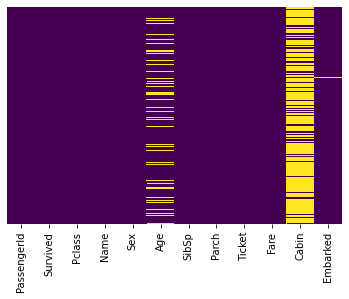

In [4]:
sns.heatmap(df_train_raw.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

Age, Cabin, and Embarked have missing values. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like too many missing values of that data to do something useful. We’ll probably drop Cabin later, or change it to another feature like “Cabin Known: 1 or 0”. The proportion of Embarked missing is very small, let’s keep it for this tutorial.

## Visualizing some more of the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

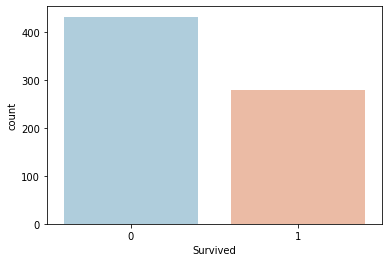

In [5]:
sns.countplot(x='Survived' , data=df_train_raw , palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

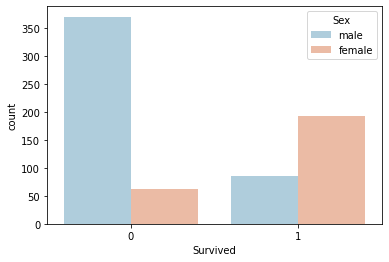

In [6]:
sns.countplot(x='Survived', 
              hue='Sex', # add legend
              data=df_train_raw,
              palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

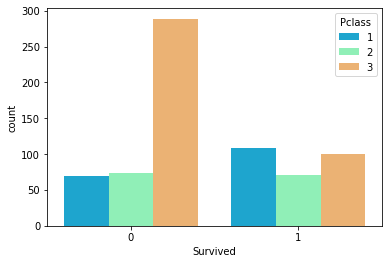

In [7]:
sns.countplot(x='Survived',
              hue='Pclass', 
              data=df_train_raw,
              palette='rainbow')

C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

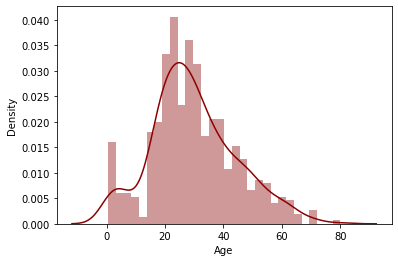

In [8]:
sns.distplot(df_train_raw['Age'].dropna(),
             kde=True,
             color='darkred',
             bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

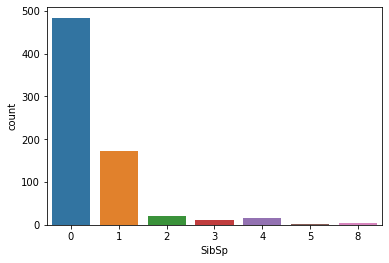

In [9]:
sns.countplot(x='SibSp',data=df_train_raw)

<AxesSubplot:>

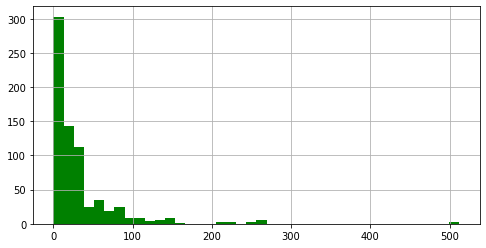

In [10]:
df_train_raw['Fare'].hist(color='green', 
                          bins=40, 
                          figsize=(8,4))

## Data cleaning

We would like to replace the missing Age with some form of imputation. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

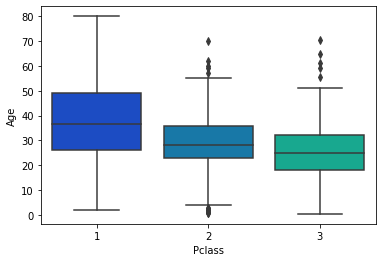

In [11]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df_train_raw,
            palette='winter')

<AxesSubplot:>

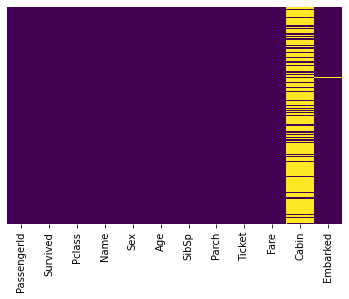

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
    
# Make a copy for test only
train_copy = df_train_raw.copy() 
train_copy['Age'] = train_copy[['Age','Pclass']].apply(impute_age, axis=1)# check that heat map again
    
    
sns.heatmap(train_copy.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

## Converting Categorical Features

We’ll need to convert categorical features to one-hot encoding. Otherwise, our machine learning algorithm won’t be able to directly take in those features as inputs.

Let’s check column datatype with info()

In [13]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        168 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [14]:
def preprocessing(df):

    dfresult = pd.DataFrame()
    
    # Let's keep features in the original order

    # Pclass -> one-hot encoding
    pclass = pd.get_dummies(df['Pclass'])
    pclass.columns = ['Pclass_' + str(x) for x in pclass.columns ]
    dfresult = pd.concat([dfresult, pclass],axis = 1)

    # Sex -> one-hot encoding
    sex = pd.get_dummies(df['Sex'])
    dfresult = pd.concat([dfresult,sex],axis = 1)

    # Age -> replace with imputation
    dfresult['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

    # SibSp, Parch, Fare
    dfresult['SibSp'] = df['SibSp']
    dfresult['Parch'] = df['Parch']
    dfresult['Fare'] = df['Fare']

    # Embarked -> one-hot encoding
    embarked = pd.get_dummies(df['Embarked'],dummy_na=True)
    embarked.columns = ['Embarked_' + str(x) for x in embarked.columns]
    dfresult = pd.concat([dfresult, embarked],axis = 1)

    return dfresult

In [15]:
x_train = preprocessing(df_train_raw)
y_train = df_train_raw['Survived'].values

x_test = preprocessing(df_test_raw)
y_test = df_test_raw['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )
x_train.head()

x_train.shape = (712, 13)
x_test.shape = (179, 13)


,Pclass_1,Pclass_2,Pclass_3,female,male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0,0,1,55.0,0,0,30.5000,0,0,1,0
1,1,0,0,1,0,49.0,1,0,76.7292,1,0,0,0
2,0,1,0,1,0,36.0,0,0,13.0000,0,0,1,0
3,0,1,0,0,1,19.0,0,0,13.0000,0,0,1,0
4,0,0,1,0,1,14.0,4,1,39.6875,0,0,1,0


# Choose a model

Usually there are three ways of modeling using APIs of Keras.

Here we take the simplest way: sequential modeling using function Sequential().

In [16]:
import tensorflow as tf 
from tensorflow.keras import models, layers

tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(10,activation = 'relu',input_shape=(13,)))
model.add(layers.Dense(20,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


# Training

Let's configure modle using model.compile

There are three ways for model training. Here we introduce the simplest way: using internal function fit.


    Sequential Model: is the easiest way to get up and running with Keras.
    Functional API: is for more complex models.
    Model Subclassing: is fully-customizable and enables you to implement your own custom forward-pass of the model.
    
    


Firstly, let’s configure our model using model.compile()

    Use optimizer Stochastic Gradient Descent (abbreviated sgd)
    Use binary cross-entropy loss function (binary_crossentropy) for our binary classification
    For simplicity, use 'accuracy' as our evaluation metrics to evaluate the model during training and testing

For training, there are three ways to train a Keras model:

    Use model.fit() to the model for a fixed number of epochs
    Use model.train_on_batch() to train with a single batch only and once.
    To create a custom training loop.

In this tutorial, let’s go ahead with the easiest way model.fit() .

In [17]:
# Convert dataframe data into np array
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Get around with KMP duplicate issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Use binary cross entropy loss function for binary classification
model.compile(optimizer='sgd',
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 30,
                    validation_split=0.2
                   )

Train on 569 samples, validate on 143 samples
Epoch 1/30
569/569 [==============================] - 1s 1ms/sample - loss: 1.2572 - accuracy: 0.5360 - val_loss: 0.6582 - val_accuracy: 0.6643
Epoch 2/30
569/569 [==============================] - 0s 58us/sample - loss: 0.6443 - accuracy: 0.6573 - val_loss: 0.6555 - val_accuracy: 0.6783
Epoch 3/30
569/569 [==============================] - 0s 50us/sample - loss: 0.6312 - accuracy: 0.6819 - val_loss: 0.6539 - val_accuracy: 0.6224
Epoch 4/30
569/569 [==============================] - 0s 52us/sample - loss: 0.6271 - accuracy: 0.6731 - val_loss: 0.6862 - val_accuracy: 0.5944
Epoch 5/30
569/569 [==============================] - 0s 53us/sample - loss: 0.6232 - accuracy: 0.6573 - val_loss: 0.6387 - val_accuracy: 0.6573
Epoch 6/30
569/569 [==============================] - 0s 47us/sample - loss: 0.6161 - accuracy: 0.6872 - val_loss: 0.6351 - val_accuracy: 0.6643
Epoch 7/30
569/569 [==============================] - 0s 49us/sample - loss: 0.6173 -

# Model Evaluation

Once training is complete, it’s time to see if the model is any good with Model Evaluation. The Model Evaluation typically involves

    Plot the progress on loss and accuracy metrics
    Test our model against data that has never been used for training. This is where the test dataset df_test that we set aside earlier come to play.

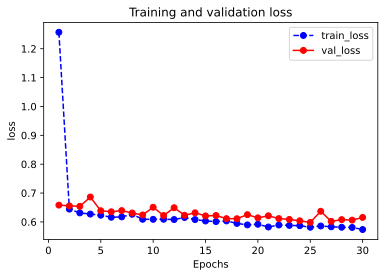

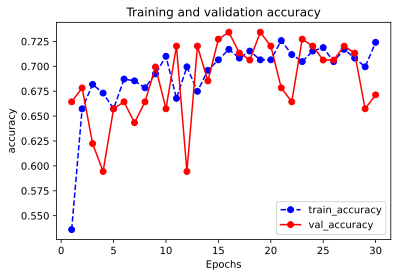

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
    
plot_metric(history,"loss")
plot_metric(history,"accuracy")

# Run against test dataset


In [19]:
# 


x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
res=model.evaluate(x = x_test,y = y_test , verbose=0)
print("loss: " , res[0] , "  , accuracy: " ,res[1] )


loss:  0.590624918484821   , accuracy:  0.6815643


# Hyperparameter tuning

Cool, we have done the evaluation for our first Machine Learning model. It is time to see if we can further improve that in any way. We can do this by turning our hyperparameters. There are a few parameters we implicitly assumed when we did our first training, and now is a good time to go back and test those assumptions and try other values.

For this tutorial, let’s just focus on the experiment with the following three hyperparameters in the model:

    The number of units in the first dense layer
    The number of units in the second dense layer
    Optimizer

In [20]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [21]:
# Clear any logs from previous runs
!rm -rf ./logs/

In [22]:
# Import the TensorBoard HParams plugin:
from tensorboard.plugins.hparams import api as hp

In [23]:
HP_NUM_UNITS_ONE = hp.HParam('num_units_one', hp.Discrete([5, 10, 20]))
HP_NUM_UNITS_TWO = hp.HParam('num_units_two', hp.Discrete([10, 20, 40]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
        hparams=[HP_NUM_UNITS_ONE, HP_NUM_UNITS_TWO, HP_OPTIMIZER],
        metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
    )

<tf.Tensor: id=2219, shape=(), dtype=bool, numpy=True>

# Adapt TensorFlow runs to log hyperparameters and metrics

Our model is quite simple: 3 dense layers. The code will look familiar, although the hyperparameters are no longer hardcoded. Instead, the hyperparameters are provided in a hyparams dictionary and used throughout the training function:


In [24]:
def train_test_model(hparams):
    model = tf.keras.models.Sequential()
    model.add(
        layers.Dense(hparams[HP_NUM_UNITS_ONE],
                     activation='relu',
                     input_shape=(13, )))
    model.add(layers.Dense(hparams[HP_NUM_UNITS_TWO], activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.fit(x_train, y_train, epochs=30)
    _, accuracy = model.evaluate(x_test, y_test , verbose=0)
    return accuracy

In [25]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

## Start runs and log them

We can now try multiple experiments, training each one with a different set of hypermeters. For simplicity, let’s use a grid search that tries all combinations of the discrete parameters and just the lower and upper bounds of the real-valued parameter.

In [26]:
session_num = 0

for num_units_one in HP_NUM_UNITS_ONE.domain.values:
    for num_units_two in HP_NUM_UNITS_TWO.domain.values:
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS_ONE: num_units_one,
                HP_NUM_UNITS_TWO: num_units_two,
                HP_OPTIMIZER: optimizer,
            }
            run_name = "run-%d" % session_num
            print('>> Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning/' + run_name, hparams)
            session_num += 1

>> Starting trial: run-0
{'num_units_one': 5, 'num_units_two': 10, 'optimizer': 'adam'}
Train on 712 samples
Epoch 1/30
712/712 [==============================] - 0s 558us/sample - loss: 5.3797 - accuracy: 0.3919
Epoch 2/30
712/712 [==============================] - 0s 65us/sample - loss: 2.7648 - accuracy: 0.3919
Epoch 3/30
712/712 [==============================] - 0s 72us/sample - loss: 1.0247 - accuracy: 0.5688
Epoch 4/30
712/712 [==============================] - 0s 69us/sample - loss: 0.6769 - accuracy: 0.6559
Epoch 5/30
712/712 [==============================] - 0s 70us/sample - loss: 0.6660 - accuracy: 0.6559
Epoch 6/30
712/712 [==============================] - 0s 114us/sample - loss: 0.6522 - accuracy: 0.6728
Epoch 7/30
712/712 [==============================] - 0s 98us/sample - loss: 0.6409 - accuracy: 0.6756
Epoch 8/30
712/712 [==============================] - 0s 107us/sample - loss: 0.6320 - accuracy: 0.6685
Epoch 9/30
712/712 [==============================] - 0s 110us/s

712/712 [==============================] - 0s 59us/sample - loss: 0.6207 - accuracy: 0.6671
Epoch 17/30
712/712 [==============================] - 0s 65us/sample - loss: 0.6275 - accuracy: 0.6587
Epoch 18/30
712/712 [==============================] - 0s 83us/sample - loss: 0.6114 - accuracy: 0.6854
Epoch 19/30
712/712 [==============================] - 0s 63us/sample - loss: 0.6080 - accuracy: 0.6742
Epoch 20/30
712/712 [==============================] - 0s 72us/sample - loss: 0.6114 - accuracy: 0.6826
Epoch 21/30
712/712 [==============================] - 0s 65us/sample - loss: 0.6052 - accuracy: 0.6770
Epoch 22/30
712/712 [==============================] - 0s 63us/sample - loss: 0.6105 - accuracy: 0.6784
Epoch 23/30
712/712 [==============================] - 0s 69us/sample - loss: 0.6019 - accuracy: 0.6882
Epoch 24/30
712/712 [==============================] - 0s 79us/sample - loss: 0.5985 - accuracy: 0.6840
Epoch 25/30
712/712 [==============================] - 0s 65us/sample - loss

712/712 [==============================] - 0s 445us/sample - loss: 0.7537 - accuracy: 0.6629
Epoch 2/30
712/712 [==============================] - 0s 69us/sample - loss: 0.6174 - accuracy: 0.6910
Epoch 3/30
712/712 [==============================] - 0s 65us/sample - loss: 0.6121 - accuracy: 0.6938
Epoch 4/30
712/712 [==============================] - 0s 59us/sample - loss: 0.6160 - accuracy: 0.6952
Epoch 5/30
712/712 [==============================] - 0s 58us/sample - loss: 0.6159 - accuracy: 0.6924
Epoch 6/30
712/712 [==============================] - 0s 59us/sample - loss: 0.6130 - accuracy: 0.6938
Epoch 7/30
712/712 [==============================] - 0s 66us/sample - loss: 0.6135 - accuracy: 0.6966
Epoch 8/30
712/712 [==============================] - 0s 63us/sample - loss: 0.6149 - accuracy: 0.6910
Epoch 9/30
712/712 [==============================] - 0s 59us/sample - loss: 0.6122 - accuracy: 0.6896
Epoch 10/30
712/712 [==============================] - 0s 60us/sample - loss: 0.611

712/712 [==============================] - 0s 55us/sample - loss: 0.5860 - accuracy: 0.7093
Epoch 19/30
712/712 [==============================] - 0s 55us/sample - loss: 0.5875 - accuracy: 0.7149
Epoch 20/30
712/712 [==============================] - 0s 56us/sample - loss: 0.5911 - accuracy: 0.7079
Epoch 21/30
712/712 [==============================] - 0s 53us/sample - loss: 0.5858 - accuracy: 0.7093
Epoch 22/30
712/712 [==============================] - 0s 55us/sample - loss: 0.5822 - accuracy: 0.6952
Epoch 23/30
712/712 [==============================] - 0s 56us/sample - loss: 0.5855 - accuracy: 0.6924
Epoch 24/30
712/712 [==============================] - 0s 56us/sample - loss: 0.5825 - accuracy: 0.7065
Epoch 25/30
712/712 [==============================] - 0s 60us/sample - loss: 0.5792 - accuracy: 0.7107
Epoch 26/30
712/712 [==============================] - 0s 55us/sample - loss: 0.5877 - accuracy: 0.6994
Epoch 27/30
712/712 [==============================] - 0s 56us/sample - loss

712/712 [==============================] - 0s 65us/sample - loss: 0.6016 - accuracy: 0.6896
Epoch 4/30
712/712 [==============================] - 0s 79us/sample - loss: 0.5784 - accuracy: 0.7093
Epoch 5/30
712/712 [==============================] - 0s 104us/sample - loss: 0.5690 - accuracy: 0.7065
Epoch 6/30
712/712 [==============================] - 0s 92us/sample - loss: 0.5601 - accuracy: 0.7233
Epoch 7/30
712/712 [==============================] - 0s 84us/sample - loss: 0.5560 - accuracy: 0.7191
Epoch 8/30
712/712 [==============================] - 0s 105us/sample - loss: 0.5469 - accuracy: 0.7317
Epoch 9/30
712/712 [==============================] - 0s 108us/sample - loss: 0.5430 - accuracy: 0.7360
Epoch 10/30
712/712 [==============================] - 0s 97us/sample - loss: 0.5414 - accuracy: 0.7219
Epoch 11/30
712/712 [==============================] - 0s 73us/sample - loss: 0.5346 - accuracy: 0.7430
Epoch 12/30
712/712 [==============================] - 0s 79us/sample - loss: 0

Epoch 20/30
712/712 [==============================] - 0s 67us/sample - loss: 0.4737 - accuracy: 0.8034
Epoch 21/30
712/712 [==============================] - 0s 62us/sample - loss: 0.4715 - accuracy: 0.7907
Epoch 22/30
712/712 [==============================] - 0s 63us/sample - loss: 0.4676 - accuracy: 0.8006
Epoch 23/30
712/712 [==============================] - 0s 74us/sample - loss: 0.4626 - accuracy: 0.8118
Epoch 24/30
712/712 [==============================] - 0s 66us/sample - loss: 0.4644 - accuracy: 0.7879
Epoch 25/30
712/712 [==============================] - 0s 70us/sample - loss: 0.4619 - accuracy: 0.8090
Epoch 26/30
712/712 [==============================] - 0s 67us/sample - loss: 0.4556 - accuracy: 0.8104
Epoch 27/30
712/712 [==============================] - 0s 79us/sample - loss: 0.4547 - accuracy: 0.7978
Epoch 28/30
712/712 [==============================] - 0s 60us/sample - loss: 0.4584 - accuracy: 0.7978
Epoch 29/30
712/712 [==============================] - 0s 63us/s

712/712 [==============================] - 0s 80us/sample - loss: 0.6621 - accuracy: 0.6629
Epoch 6/30
712/712 [==============================] - 0s 90us/sample - loss: 0.6375 - accuracy: 0.6784
Epoch 7/30
712/712 [==============================] - 0s 83us/sample - loss: 0.6049 - accuracy: 0.7008
Epoch 8/30
712/712 [==============================] - 0s 83us/sample - loss: 0.6358 - accuracy: 0.6868
Epoch 9/30
712/712 [==============================] - 0s 63us/sample - loss: 0.6358 - accuracy: 0.6882
Epoch 10/30
712/712 [==============================] - 0s 62us/sample - loss: 0.6217 - accuracy: 0.6910
Epoch 11/30
712/712 [==============================] - 0s 65us/sample - loss: 0.6093 - accuracy: 0.7022
Epoch 12/30
712/712 [==============================] - 0s 65us/sample - loss: 0.6631 - accuracy: 0.6966
Epoch 13/30
712/712 [==============================] - 0s 72us/sample - loss: 0.5999 - accuracy: 0.7121
Epoch 14/30
712/712 [==============================] - 0s 58us/sample - loss: 0.

712/712 [==============================] - 0s 60us/sample - loss: 0.5776 - accuracy: 0.7051
Epoch 22/30
712/712 [==============================] - 0s 67us/sample - loss: 0.5800 - accuracy: 0.7037
Epoch 23/30
712/712 [==============================] - 0s 59us/sample - loss: 0.5956 - accuracy: 0.6980
Epoch 24/30
712/712 [==============================] - 0s 66us/sample - loss: 0.5821 - accuracy: 0.7135
Epoch 25/30
712/712 [==============================] - 0s 60us/sample - loss: 0.5785 - accuracy: 0.7135
Epoch 26/30
712/712 [==============================] - 0s 66us/sample - loss: 0.5821 - accuracy: 0.7177
Epoch 27/30
712/712 [==============================] - 0s 63us/sample - loss: 0.5722 - accuracy: 0.7219
Epoch 28/30
712/712 [==============================] - 0s 63us/sample - loss: 0.6104 - accuracy: 0.6826
Epoch 29/30
712/712 [==============================] - 0s 59us/sample - loss: 0.5844 - accuracy: 0.7008
Epoch 30/30
712/712 [==============================] - 0s 73us/sample - loss

## Visualize the results in TensorBoard’s HParams plugin

Once the run is complete, open your terminal and cd into the project directory. Then, the HParams dashboard can now be opened by running the following command in terminal.

TensorBoard 2.0.0 at http://localhost:6006/ (Press CTRL+C to quit)


Open the dashboard in browser and go straight to HPARAMS -> PARALLEL COORDINATES VIEW

In [27]:
tensorboard --logdir logs/hparam_tuning

Reusing TensorBoard on port 6006 (pid 11836), started 0:05:23 ago. (Use '!kill 11836' to kill it.)

# Prediction (and save model)

Now, we have got the best Machine Learning model in terms of accuracy. The final step is to use this model to make predictions or inferences. This is the point of all this work, where the value of machine learning is realized. We can finally use our model to predict whether passengers are survival or not.

In [28]:
model.predict(x_test[0:10])

array([[0.18275893],
       [0.3407929 ],
       [0.39005738],
       [0.38006017],
       [0.45218587],
       [0.28687888],
       [0.3216904 ],
       [0.43647528],
       [0.4608088 ],
       [0.24322936]], dtype=float32)

In [29]:
model.predict_classes(x_test[0:10])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [30]:
model.save('data/keras_model.h5')

del model  # Deleting current model

# Identical to the previous one
model = models.load_model('data/keras_model.h5')
model.evaluate(x_test,y_test , verbose = 0)

[0.590624918484821, 0.6815643]

# And to load a model saved via save()

In [31]:
model = models.load_model('data/keras_model.h5')# Predict class
model.predict_classes(x_test[0:10])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])